In [3]:

# In the example below, we will see how to screen scrape job postings from a popular web site.
# Let's try two approaches, including ChatGPT and good old fashioned know-how.


In [1]:

# solution that ChatGPT came up with.
'python beautifulsoup screen scrape job postings'

# code generated by ChatGPT
import requests
from bs4 import BeautifulSoup

url = 'https://www.glassdoor.com/Job/remote-management-consulting-jobs-SRCH_IL.0,6_IS11047_KO7,28_IP2.htm?includeNoSalaryJobs=true&pgc=AB4AAYEAHgAAAAAAAAAAAAAAAgFiDFwAUAECAQcWBwFKyTmKLvMuIrb9hMD7sm9YIecZwRhod7KWF%2BZXi2pGKMdGqNtt6KVodRfMMDAxtJ8cU4E6Gk2lterzEBLei6TDbnwZjmaDDXToAAA%3D'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

job_listings = []

for job in soup.find_all('div', class_='job'):
    title = job.find('h2', class_='job-title').text
    location = job.find('span', class_='job-location').text
    description = job.find('div', class_='job-description').text
    job_listings.append({'title': title, 'location': location, 'description': description})

print(job_listings)


[]


In [1]:

# Ok, so although ChatGPT is quite a remarkable tool, and it can be used to do all kinds of amazing things, 
# in this case, ChatGPT couldn't solve this particular problem for us. Let's try another approcah.
# The User-Agent request header is a characteristic string that lets servers and network peers identify the 
# application, operating system, vendor, and/or version of the requesting user agent.

import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://www.glassdoor.com/Job/remote-management-consulting-jobs-SRCH_IL.0,6_IS11047_KO7,28_IP2.htm?includeNoSalaryJobs=true&pgc=AB4AAYEAHgAAAAAAAAAAAAAAAgFiDFwAUAECAQcWBwFKyTmKLvMuIrb9hMD7sm9YIecZwRhod7KWF%2BZXi2pGKMdGqNtt6KVodRfMMDAxtJ8cU4E6Gk2lterzEBLei6TDbnwZjmaDDXToAAA%3D"

headers = {
    "User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:108.0) Gecko/20100101 Firefox/108.0"
}
soup = BeautifulSoup(requests.get(url, headers=headers).content, "lxml") # <-- don't use html.parser here

table = soup.select_one("table")
for td in table.tr.select('td'):
    td.name = 'th'

df = pd.read_html(str(table))[0]
print(df.head())


                                           Job Title  \
0  ProFee & Facility Outpatient Auditor - Behavio...   
1                    Remote Customer Chat specialist   
2  Licensed Mental Health Professionals (LPC, LCS...   
3              SAP Production Planning Solution Lead   
4             Outpatient & Inpatient Claim Validator   

                         Employer         Location  Salary  
0  STAR Medical Auditing Services           Remote     NaN  
1               Elite Clozers LLC           Remote     NaN  
2   Cornerstone Counseling Center  Plantsville, CT     NaN  
3              Tech Intellectuals           Remote     NaN  
4  STAR Medical Auditing Services           Remote     NaN  


In [ ]:

# Final Result:
                                                                Job Title  \
0                ProFee & Facility Outpatient Auditor - Behavioral Health   
1                                         Remote Customer Chat specialist   
2                  Licensed Mental Health Professionals (LPC, LCSW, LMFT)   
3                                   SAP Production Planning Solution Lead   
4                                  Outpatient & Inpatient Claim Validator   
5                           MES Automotive Consultant in Connected Plants   
6                                       Epic Clarity/Cogito Administrator   
7                                       Healthcare Revenue Integrity Lead   
8                                                 M365 Solution Architect   
9                                          Electrical Engineering Manager   
10                                                        Marine Designer   
11                                                               Forester   
12                         Coding and OASIS Reviewer - 1099 Contract Role   
13                Dynamics 365 Supply Chain Management Solution Architect   
14  Japanese Speaker preferred-Manager of Business Development (ICT Dept)   
15                                                      Fire Investigator   
16                                          Medical Data Entry Specialist   
17                                                      M & A Tax Manager   
18                                                PV Solar Plant Engineer   
19                                      Land Mobile Radio Project Manager   
20                                                   Technical Consultant   
21                             Dynamics 365 Business Central - Consultant   
22                                       Forensic Mechanical Engineer, PE   
23                                                  EPIC Tapestry Analyst   
24                                   Client Solutions Executive - MA & NH   
25                                         Architectural Sales Specialist   
26                                               Project Assistant-Remote   
27                                                              Architect   
28                                                 Senior Project Manager   
29                                                   Energy/Climate Coach   

                                  Employer         Location  Salary  
0           STAR Medical Auditing Services           Remote     NaN  
1                        Elite Clozers LLC           Remote     NaN  
2            Cornerstone Counseling Center  Plantsville, CT     NaN  
3                       Tech Intellectuals           Remote     NaN  
4           STAR Medical Auditing Services           Remote     NaN  
5                       Tech Intellectuals           Remote     NaN  
6                          Sapphire Health           Remote     NaN  
7                                    Jobot    Nashville, TN     NaN  
8              Lexmark International, Inc.           Remote     NaN  
9   Canfield Engineering & Integration LLC           Remote     NaN  
10                     Hockema Group, Inc.           Remote     NaN  
11                     Forest Carbon Works        Wisconsin     NaN  
12           Healthcare Provider Solutions           Remote     NaN  
13                               Avantiico           Remote     NaN  
14          Mitsui Chemicals America, Inc.           Remote     NaN  
15                        EFI Global, Inc.      Memphis, TN     NaN  
16    Behavioral Health RCM Solutions, LLC           Remote     NaN  
17                            Brain Crunch           Remote     NaN  
18               Atkins North America Inc.           Remote     NaN  
19               Federal Engineering, Inc.           Remote     NaN  
20                        Xigent Solutions        Minnesota     NaN  
21                              Sikich LLP           Remote     NaN  
22                        EFI Global, Inc.       Boston, MA     NaN  
23                    All IT Solutions LLC           Remote     NaN  
24                         Mutualink, Inc.    New Hampshire     NaN  
25                  Brock11 Consulting LLC           Remote     NaN  
26   EA Engineering Science and Technology           Remote     NaN  
27                            FENTRESS INC           Remote     NaN  
28                               TalentAmp           Remote     NaN  
29                       Stillwater Energy           Remote     NaN  


In [12]:

# Yeah! We got it working!


In [4]:

# Here are some other quite useful things that you can do with Mozilla
# Mozilla API call for stock/equity related data from NASDAQ

import pandas as pd
import requests


headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:86.0) Gecko/20100101 Firefox/86.0"
}

params = {
    'tableonly': 'true',
    'limit': 10000
}
r = requests.get(
    'https://api.nasdaq.com/api/screener/stocks', params=params, headers=headers)
goal = pd.DataFrame(r.json()['data']['table']['rows'])
print(goal)

# goal.to_csv('C:\\Users\\ryans\\OneDrive\\Desktop\\data.csv', index=False)


     symbol  \
0      AAPL   
1      MSFT   
2      GOOG   
3     GOOGL   
4      AMZN   
...     ...   
7751  ZIONO   
7752  ZIONP   
7753  ZIVOW   
7754  ZTAQW   
7755  ZURAW   

                                                                                                                                                                name  \
0                                                                                                                                            Apple Inc. Common Stock   
1                                                                                                                                 Microsoft Corporation Common Stock   
2                                                                                                                                Alphabet Inc. Class C Capital Stock   
3                                                                                                                                 Alphabet Inc. Cla

In [1]:

# Let's fetch some fundamental-related data about publicly traded stocks/corporations

import requests
from bs4 import BeautifulSoup
from pandas import DataFrame
import itertools
import numpy as np
from itertools import chain
import pandas as pd


url_base = "https://finviz.com/quote.ashx?t="

tckr = ['AXP','AMGN','AAPL','BA','CAT','CSCO','CVX','GS','HD','HON','IBM','INTC','JNJ','KO','JPM','MCD','MMM','MRK','MSFT','NKE','PG','TRV','UNH','CRM','VZ','V','WBA','WMT','DIS']
        
i = 1

url_list = [(s, url_base + s) for s in tckr]
data_list = []

headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:76.0) Gecko/20100101 Firefox/76.0'}

for t, url in url_list:
    print(i)
    i = i + 1
    print(t, url)
    print('Scrapping ticker {}...'.format(t))
    soup = BeautifulSoup(requests.get(url, headers=headers).content, 'html.parser')
    #writer.writerow([t])
    l = []
    for row in soup.select('.snapshot-table2 tr'):
        l.append([td.text for td in row.select('td')])
        x = list(chain.from_iterable(l))
        d = dict(zip(x[::2], x[1::2]))
        d['Index'] = t
        
    data_list.append(d)


df = pd.DataFrame(data_list)
df.head()


1
AXP https://finviz.com/quote.ashx?t=AXP
Scrapping ticker AXP...
2
AMGN https://finviz.com/quote.ashx?t=AMGN
Scrapping ticker AMGN...
3
AAPL https://finviz.com/quote.ashx?t=AAPL
Scrapping ticker AAPL...
4
BA https://finviz.com/quote.ashx?t=BA
Scrapping ticker BA...
5
CAT https://finviz.com/quote.ashx?t=CAT
Scrapping ticker CAT...
6
CSCO https://finviz.com/quote.ashx?t=CSCO
Scrapping ticker CSCO...
7
CVX https://finviz.com/quote.ashx?t=CVX
Scrapping ticker CVX...
8
GS https://finviz.com/quote.ashx?t=GS
Scrapping ticker GS...
9
HD https://finviz.com/quote.ashx?t=HD
Scrapping ticker HD...
10
HON https://finviz.com/quote.ashx?t=HON
Scrapping ticker HON...
11
IBM https://finviz.com/quote.ashx?t=IBM
Scrapping ticker IBM...
12
INTC https://finviz.com/quote.ashx?t=INTC
Scrapping ticker INTC...
13
JNJ https://finviz.com/quote.ashx?t=JNJ
Scrapping ticker JNJ...
14
KO https://finviz.com/quote.ashx?t=KO
Scrapping ticker KO...
15
JPM https://finviz.com/quote.ashx?t=JPM
Scrapping ticker JPM...
16
M

,Index,P/E,EPS (ttm),Insider Own,Shs Outstand,Perf Week,Market Cap,Forward P/E,EPS next Y,Insider Trans,...,Earnings,Payout,Avg Volume,Price,Recom,SMA20,SMA50,SMA200,Volume,Change
0,AXP,15.99,9.54,0.14%,743.00M,-5.39%,110.60B,12.22,12.08%,-10.57%,...,Apr 20 BMO,21.80%,3.32M,152.65,2.40,-4.37%,-6.86%,-2.45%,"2,221,061",2.58%
1,AMGN,16.07,14.72,0.22%,534.00M,-1.34%,123.90B,12.73,4.17%,-0.08%,...,Apr 27 AMC,53.70%,2.34M,236.53,2.70,-3.03%,-0.98%,-5.92%,"2,806,742",2.00%
2,AAPL,29.49,5.89,0.07%,15.89B,2.29%,2623.12B,26.48,9.91%,-4.52%,...,May 04 AMC,14.60%,59.59M,173.57,2.00,4.82%,8.99%,14.74%,"113,095,575",4.69%
3,BA,-,-6.92,0.10%,602.50M,-4.08%,118.54B,36.68,416.40%,4.53%,...,Apr 26 BMO,-,5.68M,198.34,2.20,-3.85%,-3.58%,10.04%,"3,866,220",0.65%
4,CAT,15.90,13.53,-,516.20M,-1.70%,108.42B,11.87,1.48%,-11.96%,...,Apr 27 BMO,34.60%,3.15M,215.09,2.70,-1.75%,-4.69%,-0.72%,"2,702,445",2.24%


In [6]:

# grab JSON data and then normalize nested strings

import requests
import pandas as pd
headers = {
    'accept': 'application/json, text/plain, */*',
    'origin': 'https://www.nasdaq.com',
'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.5112.79 Safari/537.36'
}

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

url = 'https://api.nasdaq.com/api/company/AAPL/institutional-holdings?limit=7000&offset=0&type=TOTAL&sortColumn=marketValue&sortOrder=DESC'
r = requests.get(url, headers=headers)
df = pd.json_normalize(r.json()['data']['holdingsTransactions']['table']['rows'])
print(df)


                                   ownerName        date     sharesHeld  \
0                         VANGUARD GROUP INC  12/31/2022  1,278,250,538   
1                             BLACKROCK INC.  12/31/2022  1,029,208,322   
2                     BERKSHIRE HATHAWAY INC  12/31/2022    895,136,175   
3                          STATE STREET CORP  12/31/2022    586,857,405   
4                                    FMR LLC  12/31/2022    321,162,411   
...                                      ...         ...            ...   
4616                     VIRTU FINANCIAL LLC  12/31/2022              0   
4617  WEAVER C. BARKSDALE & ASSOCIATES, INC.  12/31/2022              0   
4618               WEISS ASSET MANAGEMENT LP  12/31/2022              0   
4619            WELLS FINANCIAL ADVISORS INC  12/31/2022              0   
4620                       WJ INTERESTS, LLC  03/31/2023              0   

     sharesChange sharesChangePCT   marketValue  \
0       5,871,637          0.461%  $209,326,308 

In [8]:

# import NBA stats

import requests
import pandas as pd


url = 'https://stats.nba.com/stats/leaguegamelog'
headers= {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36',
          'Referer': 'https://www.nba.com/'}
payload = {
    'Counter': '1000',
    'DateFrom': '',
    'DateTo': '',
    'Direction': 'DESC',
    'LeagueID': '00',
    'PlayerOrTeam': 'T',
    'Season': '2021-22',
    'SeasonType': 'Regular Season',
    'Sorter': 'DATE'}

jsonData = requests.get(url, headers=headers, params=payload).json()


rows = jsonData['resultSets'][0]['rowSet']
columns = jsonData['resultSets'][0]['headers']

df = pd.DataFrame(rows, columns=columns)
df.head()


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22021,1610612738,BOS,Boston Celtics,0022101223,2022-04-10,BOS @ MEM,W,240,54,99,0.545,18,48,0.375,13,13,1.000,14,42,56,34,5,2,15,20,139,29,1
1,22021,1610612739,CLE,Cleveland Cavaliers,0022101218,2022-04-10,CLE vs. MIL,W,240,51,94,0.543,19,38,0.500,12,17,0.706,10,38,48,39,5,5,12,26,133,18,1
2,22021,1610612749,MIL,Milwaukee Bucks,0022101218,2022-04-10,MIL @ CLE,L,240,39,88,0.443,12,30,0.400,25,32,0.781,8,33,41,27,7,2,12,14,115,-18,1
3,22021,1610612737,ATL,Atlanta Hawks,0022101221,2022-04-10,ATL @ HOU,W,240,45,87,0.517,21,38,0.553,19,24,0.792,13,37,50,29,4,4,13,19,130,16,1
4,22021,1610612764,WAS,Washington Wizards,0022101217,2022-04-10,WAS @ CHA,L,240,42,94,0.447,8,23,0.348,16,26,0.615,17,26,43,25,12,3,11,16,108,-16,1


In [1]:

# Loop through a bunch of web pages dynamically, and scrape data from each one as you go

import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

big_df = pd.DataFrame()

headers = {
    'accept-language': 'en-US,en;q=0.9',
    'bx-v': '2.2.3',
    'content-length': '80',
    'content-type': 'application/json',
    'origin': 'https://aliexpress.ru',
    'referer': 'https://aliexpress.ru/popular/silicone-night-light.html?CatId=0&g=n&page=3&spm=a2g0o.productlist.1000002.0',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36'
}

s = requests.Session()
s.headers.update(headers)

x = 1
while True:
    try:
        print('doing page', x)
        payload = '{"catId":"0","g":"n","searchText":"silicone night light","storeIds":[],"page":' + str(x) + '}'
        r = s.post('https://aliexpress.ru/aer-webapi/v1/seo/popular_search?_bx-v=2.2.3', data=payload)
        df = pd.json_normalize(r.json()['data']['productsFeed']['products'])
        big_df = pd.concat([big_df, df], axis=0, ignore_index=True)
        x+=1
    except Exception as e:
        print('all done')
        break
print(big_df)


doing page 1
doing page 2
doing page 3
all done
                   id  \
0    1005004848996681   
1    1005005418840933   
2    1005003630682540   
3    1005002622315739   
4    1005002721326745   
..                ...   
123  1005004849441344   
124  1005001722024974   
125  1005005486608748   
126  1005004705356258   
127  1005005469758453   

                                                                      imgSrc  \
0    //ae04.alicdn.com/kf/Saf18af65e8d3408982c5dd959fe30ebfH.jpg_350x350.jpg   
1    //ae04.alicdn.com/kf/S6cd96bf180c846c3acb92eb68d64c522k.jpg_350x350.jpg   
2    //ae04.alicdn.com/kf/Sbafc797e029043e8ab1af14759538762R.jpg_350x350.jpg   
3    //ae04.alicdn.com/kf/Sfe5b6263286a4ced94f67f91853230fbY.jpg_350x350.jpg   
4    //ae04.alicdn.com/kf/H5f240ab5f9124d96b1c92ff7b1628944M.jpg_350x350.jpg   
..                                                                       ...   
123  //ae04.alicdn.com/kf/S162d981b2e5e433a8fbdfe28634a21e0I.jpg_350x350.jpg   
124  //ae04

In [2]:

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Specify the path to the chromedriver executable
chromedriver_path = 'C:\\Users\\utilities\\chromedriver.exe'

# Configure Chrome options
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Optional: run headless if you don't want to see the browser window
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:86.0) Gecko/20100101 Firefox/86.0")

# Create a new instance of the Chrome driver
service = Service(chromedriver_path)
driver = webdriver.Chrome(service=service, options=options)

# Open the URL
url = "https://etfdb.com/screener/#page=1&tab=returns&sort_by=one_month_return&sort_direction=desc&asset_class=equity"
driver.get(url)

# Wait for the page to fully load (wait for the tbody element)
try:
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "tbody")))
    time.sleep(3)  # Wait additional 3 seconds to ensure content is fully loaded
except:
    print("Timeout waiting for page to load")

# Extract the HTML content after waiting
html = driver.page_source


# File path where you want to save the text file...just to visually check the contents of the HTML...
#file_path = "C:\\Users\\ryan_\\Desktop\\output.txt"

# Open the file in write mode with UTF-8 encoding
#with open(file_path, "w", encoding="utf-8") as text_file:
#    # Write the string to the file
#    text_file.write(html)

#print("String has been exported to", file_path)

# Close the browser
driver.quit()


from bs4 import BeautifulSoup
import pandas as pd

# Parse the HTML
soup = BeautifulSoup(html, "html.parser")

# Extract the rows
rows = soup.find_all("tr")

# Initialize lists to store data
data = {"Symbol": [], "ETF Name": [], "1 Week": [], "1 Month": [], "YTD": [], "1 Year": [], "3 Year": [], "5 Year": [], "Returns Rating": []}

# Loop through rows and extract data
for row in rows:
    cols = row.find_all(["td", "th"])
    if len(cols) == 9:  # Ensure we have the correct number of columns
        data["Symbol"].append(cols[0].text.strip())
        data["ETF Name"].append(cols[1].text.strip())
        data["1 Week"].append(cols[2].text.strip())
        data["1 Month"].append(cols[3].text.strip())
        data["YTD"].append(cols[4].text.strip())
        data["1 Year"].append(cols[5].text.strip())
        data["3 Year"].append(cols[6].text.strip())
        data["5 Year"].append(cols[7].text.strip())
        data["Returns Rating"].append(cols[8].text.strip())

# Create DataFrame
df = pd.DataFrame(data)
print(df)

# save the final results to a CSV file...if necessary...
# df.to_csv('C:\\Users\\ryan_\\Desktop\\output.csv')


    Symbol                                           ETF Name  \
0   Symbol                                           ETF Name   
1     CONL               GraniteShares 2x Long COIN Daily ETF   
2     CRPT  First Trust SkyBridge Crypto Industry & Digita...   
3     MSTY           YieldMax MSTR Option Income Strategy ETF   
4     CONY           YieldMax COIN Option Income Strategy ETF   
5     NVDX              T-Rex 2X Long NVIDIA Daily Target ETF   
6     NVDL               GraniteShares 2x Long NVDA Daily ETF   
7     STCE                         Schwab Crypto Thematic ETF   
8     BKCH                            Global X Blockchain ETF   
9     BITQ             Bitwise Crypto Industry Innovators ETF   
10    DAPP                  VanEck Digital Transformation ETF   
11    SOXL        Direxion Daily Semiconductor Bull 3x Shares   
12    NVDU               Direxion Daily NVDA Bull 1.5X Shares   
13    LABU          Direxion Daily S&P Biotech Bull 3x Shares   
14    FDIG  Fidelity Cryp

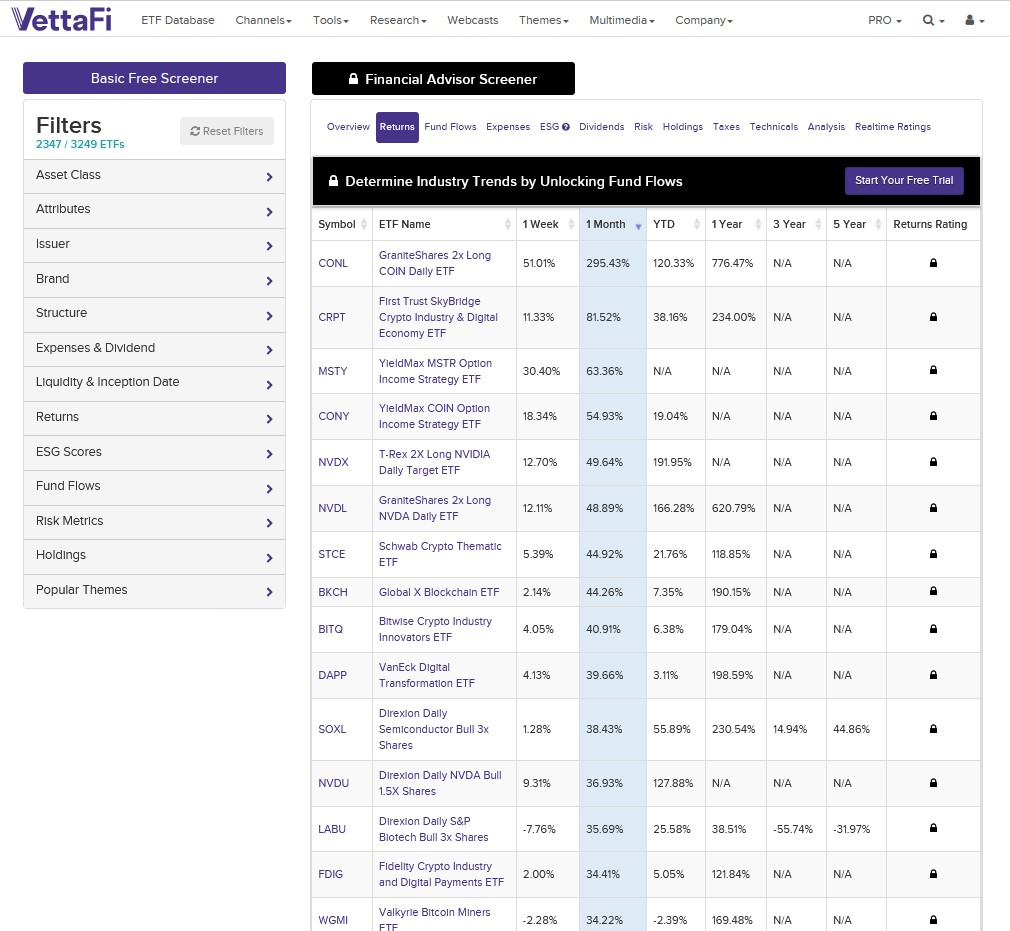

In [7]:

# Focur your attention on the column named '1 Month'
# 295.43%, 81.52%, 63.36%, 54.93%, 49.64%, ... 35.69%, 34.41%, 34.22%, etc.

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\ryan_\\"
Image(filename = PATH + "ETF_Database.JPG")


In [ ]:

# Good Stuff!!
